In [1]:
from google.colab import drive
drive.mount('/content/drive/')

# ======= < Basic imports > ==============
import nltk
import nltk.classify.util
import numpy as np
import pandas as pd
import string
import unicodedata
import sklearn.datasets,sys,re,timeit
import json
import argparse
import matplotlib.pyplot as plt
import seaborn
import warnings
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
from tokenize import tokenize, untokenize, NUMBER, STRING, NAME, OP
from wordcloud import WordCloud
import matplotlib.gridspec as gridspec
import itertools
import sqlite3
import time
import sys
import gensim
import random
import keras.backend as K
import matplotlib.pyplot as plt
import seaborn as sns
import time

# =========== < End > ===================

#========= Classifiers ===========================================
from nltk.corpus import names
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import GradientBoostingClassifier, RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import FunctionTransformer,StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest,SelectFromModel,f_regression
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.linear_model import Ridge,Lasso,RidgeClassifier,SGDClassifier
from sklearn.utils import shuffle
from mlxtend.classifier import EnsembleVoteClassifier
from itertools import combinations
#from mlens.ensemble import SuperLearner
from gensim.models.word2vec import Word2Vec
from gensim.models import FastText  
#from glove import Corpus, Glove
# =========== < End > ===================

#========== <Count Vectorization,feature extraction and summaries > ======================
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import  train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, classification_report, precision_recall_fscore_support
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,mean_squared_error,mean_absolute_error
# =========== < End > ===================

from sklearn.metrics import precision_recall_fscore_support as score
from keras.models import Sequential,Model
from keras.layers import Conv1D, Dropout, Dense, Flatten, LSTM, MaxPooling1D, Bidirectional,Activation, Input, Embedding,GRU
from keras.optimizers import Adam,RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, TensorBoard
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import word2vec,FastText 
from sklearn.preprocessing import scale
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tqdm import tqdm
from collections import Counter

Mounted at /content/drive/


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
import pickle

In [3]:
def RemoveHTMLElementsForDf(inputListDf):
        try:
            for i in range(len(inputListDf)):
                currentPhase= inputListDf['Comments1'].values[i]
                inputListDf['Comments1'].values[i] =BeautifulSoup(currentPhase,"html.parser").get_text()
            
            return inputListDf

        except Exception as e:        
                  e = sys.exc_info()[1]
                  fullError="RemoveHTMLElementsForDf: "+str(e)+"\n"
                  raise Exception(fullError)

In [4]:
 def RemoveNonWordEntriesForDf(inputDf):
          try:

              nonWordEntryList=[]
              #Remove non words
              for i in range(len(inputDf)):
                  currentPhase= inputDf['Comments1'].values[i]     

                  #Then append back after checking for numerical values
                  inputDf['Comments1'].values[i]=(' '.join([word for word in currentPhase.split() if word.isdigit()==False]))       

              return inputDf     

          except Exception as e:
                    e = sys.exc_info()[1]
                    fullError="RemoveNonWordEntriesForDf: "+str(e)+"\n"
                    raise Exception(fullError)

In [5]:
def RemoveSpecialCharactersForDf(inputListDf,pronounsList):
        try:
            regex = re.compile('[%s]' % re.escape(string.punctuation))
            cleanedList = []
           
            for i in range(len(inputListDf)):
                currentPhrase= inputListDf['Comments1'].values[i]
                tokenizedList = []
                punctuationSplittedList=[]
                punctuationRemovedString = ""
                for splitPhrase in currentPhrase.split():
                    splitPhrase = re.sub('\@\w+', '', splitPhrase)
                    splitPhrase = re.sub('\#\w+','', splitPhrase)
                    splitPhrase = re.sub('\#','',splitPhrase)
                    splitPhrase = re.sub('RT','',splitPhrase)
                    splitPhrase = re.sub('&amp;','',splitPhrase)
                    splitPhrase = re.sub('[0-9]+','',splitPhrase)
                    splitPhrase = re.sub('//t.co/\w+','',splitPhrase)
                    splitPhrase = re.sub('w//','',splitPhrase)
                    splitPhrase = splitPhrase.lower()
                    tokenizedList.append(splitPhrase.split())   
                    
                for tokenizedElem in tokenizedList:
                    punctuation_Removed_Elem=regex.sub('', str(tokenizedElem))
                    punctuationSplittedList.append(punctuation_Removed_Elem)
                    
                                       
                for elem in punctuationSplittedList:         
                    if  elem not in pronounsList:
                        punctuationRemovedString+=(" "+elem.lower())
                        
                        
                inputListDf['Comments1'].values[i]=punctuationRemovedString
                
            return inputListDf

        except Exception as e:        
            e = sys.exc_info()[1]
            fullError="RemoveSpecialCharactersForDf: "+str(e)+"\n"
            raise Exception(fullError)
            #return fullError

In [6]:
#setting the data sets 
trainingDataPath='/content/drive/My Drive/Colab Notebooks/FYP/CommentsRefined.csv'
pronounsListPath='/content/drive/My Drive/Colab Notebooks/FYP/Pronouns.csv'
trainingData_df= pd.read_csv(trainingDataPath,usecols=[0,1],header='infer',encoding='utf-8')  
pronouns_df=pd.read_csv(pronounsListPath,usecols=[0],header=None,encoding='utf-8')            
pronounsList=pronouns_df[0].values.tolist()


In [7]:
htmlCleanedTraining_Df=RemoveHTMLElementsForDf(trainingData_df)
specialSymbolCleanedPhrases_Df=RemoveSpecialCharactersForDf(htmlCleanedTraining_Df,pronounsList)
speechCleaned_NonWord_Df=RemoveNonWordEntriesForDf(specialSymbolCleanedPhrases_Df)
speechCleaned_NonWord_Df=speechCleaned_NonWord_Df.head(801)
speechCleaned_NonWord_Df=shuffle(speechCleaned_NonWord_Df)
#print(speechCleaned_NonWord_Df)

In [8]:
# Create classifiers
dt=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                                            max_depth=3, max_features=None, max_leaf_nodes=None,
                                            min_impurity_decrease=0.0, min_impurity_split=None,
                                            min_samples_leaf=1, min_samples_split=10,
                                            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                                            splitter='best')

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                                            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                                            min_impurity_decrease=0.0, min_impurity_split=None,
                                            min_samples_leaf=1, min_samples_split=2,
                                            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
                                            oob_score=False, random_state=0, verbose=0, warm_start=False)

ad=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                      learning_rate=0.05, n_estimators=16, random_state=None)

lg=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                      intercept_scaling=1, max_iter=100, multi_class='multinomial',
                                      n_jobs=1, penalty='l1', random_state=0, solver='saga',
                                      tol=0.0001, verbose=0, warm_start=False)

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(speechCleaned_NonWord_Df.Comments1,speechCleaned_NonWord_Df.isPositive,
                                                 test_size=0.2,random_state=5,shuffle=True)

In [10]:
X_train

202            touch inferior to last carries more fibre
700            of a useful style yet needs to be cleaner
718                               blackish tending flaky
728    greyish uneven spoilt by one or two brown leaf...
770                                               shotty
                             ...                        
721              brownish very mixed spoilt by cut stalk
768                                         well twisted
209                      carries tips spoilt by red ends
361     tending brown spoilt extract occasional red ends
59            touch brown contains ragged leaf particles
Name: Comments1, Length: 640, dtype: object

In [13]:
def vectorize_text(x_train):
        token = RegexpTokenizer(r'[a-zA-Z0-9]+')
        count_vect = CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                                            encoding='utf-8', input='content',
                                            lowercase=True, max_df=1.0, max_features=None, min_df=1,
                                            ngram_range=(1,2), preprocessor=None, stop_words=None,
                                            strip_accents=None,tokenizer=token.tokenize, vocabulary=None)
        
        x_train_counts = count_vect.fit_transform(x_train)
        tf_idf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=True)
        x_train_tf_idf = tf_idf_transformer.fit_transform(x_train_counts)
        return count_vect,x_train_tf_idf

In [16]:
print(x_train_tf_idf)

  (0, 231)	0.14977129647423776
  (0, 244)	0.3595860844661775
  (0, 399)	0.17924846839975117
  (0, 511)	0.2725517832936143
  (0, 515)	0.2861773074288281
  (0, 522)	0.2861773074288281
  (0, 524)	0.382494641017052
  (0, 607)	0.1932268946962914
  (0, 614)	0.34333220492476874
  (0, 878)	0.17267985302511224
  (0, 884)	0.2861773074288281
  (0, 894)	0.18847624462290047
  (0, 903)	0.3595860844661775
  (1, 0)	0.1790696174185192
  (1, 15)	0.23195164668338406
  (1, 39)	0.17196859445112636
  (1, 42)	0.27115753663987624
  (1, 272)	0.24485005948001012
  (1, 627)	0.25245436752077877
  (1, 628)	0.25245436752077877
  (1, 650)	0.1760124913659981
  (1, 651)	0.18925283491436784
  (1, 821)	0.19463787195274226
  (1, 837)	0.3173744941710397
  (1, 878)	0.1915042862754036
  :	:
  (637, 877)	0.4134944645693101
  (638, 156)	0.18057610166685717
  (638, 176)	0.3786027007331095
  (638, 323)	0.2169599263109735
  (638, 363)	0.3010747958589325
  (638, 367)	0.3786027007331095
  (638, 640)	0.221825999453458
  (638, 648)	

In [14]:
eclf=VotingClassifier(estimators=[('dt', dt), ('rf', rf), ('ad', ad),('lg',lg)], voting='soft')

count_vect,x_train_tf_idf=vectorize_text(X_train)            
built_classifier = eclf.fit(x_train_tf_idf, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
built_classifier.score(x_train_tf_idf,Y_train)

0.909375

In [ ]:
model_path='/content/drive/My Drive/Colab Notebooks/FYP/Ranking_predict_model_new.h5'
count_vec_obj_path='/content/drive/My Drive/Colab Notebooks/FYP/countVectorizer.pkl'

In [ ]:
pickle.dump(built_classifier, open(model_path, 'wb'))
pickle.dump(count_vect, open(count_vec_obj_path, 'wb'))

In [ ]:
clf_for_prediction=pickle.load(open(model_path, 'rb'))
count_vect=pickle.load(open(count_vec_obj_path, 'rb'))

In [ ]:
def vectorize_text_for_test(x_test):
  x_test_counts = count_vect.transform(x_test)
  tf_idf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=True)
  x_test_tf_idf = tf_idf_transformer.fit_transform(x_test_counts)
  return x_test_tf_idf

In [ ]:
x_test = vectorize_text_for_test(X_test)

In [ ]:
accuracy = clf_for_prediction.score(x_test,Y_test)
print("accuracy :",accuracy)

accuracy : 0.91875


In [ ]:
pred = clf_for_prediction.predict(x_test)
precision = precision_score(Y_test, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, pred)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(Y_test, pred)
print('F1 score: %f' % f1)

Precision: 0.897727


In [ ]:
matrix = confusion_matrix(Y_test, pred)
print(matrix)

[[68  9]
 [ 4 79]]


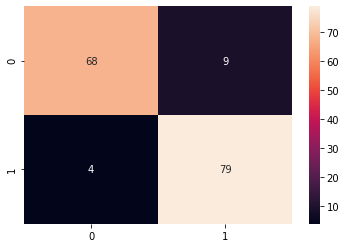

In [ ]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

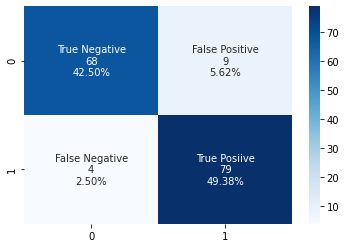

In [ ]:
group_names = ["True Negative","False Positive","False Negative","True Posiive"]
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt="", cmap="Blues")

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.962


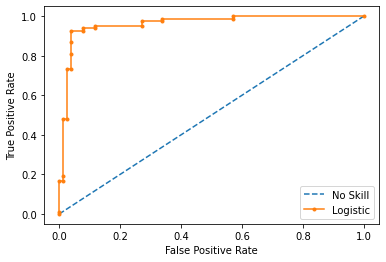

In [ ]:
# predict probabilities
lr_probs = clf_for_prediction.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
report = classification_report(Y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        77
           1       0.90      0.95      0.92        83

    accuracy                           0.92       160
   macro avg       0.92      0.92      0.92       160
weighted avg       0.92      0.92      0.92       160



In [ ]:
result = clf_for_prediction.predict(x_test)

In [ ]:
df = pd.DataFrame(X_test)
df.insert(1, "Predicion", result, True)

In [ ]:
df

,Comments1,Predicion
283,should be more twisted even to advantage,1
346,brownish stalky,0
408,greyish carries ragged leaf,0
786,blackish heavy,1
255,fairly wiry however could be more even,1
...,...,...
527,brownish stalky mixed,0
1,little leafy mixed inf fair liq possess fair c...,0
342,blackish mixed with fgs particles,0
747,brownish powdery carries some fibre inf fair l...,0


In [ ]:
!pip install flask-ngrok

In [ ]:
import os
import shutil

from flask import Flask, flash, request, redirect, render_template
from werkzeug.utils import secure_filename
from flask import Flask, session
from fastai.vision import *
from flask_ngrok import run_with_ngrok


basedir = '/content/drive/My Drive/Colab Notebooks/FYP/'

UPLOAD_FOLDER = os.path.join('Static', 'csv')

app = Flask(__name__)
run_with_ngrok(app)   

app.secret_key = "secret key"
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
app.config['MAX_CONTENT_LENGTH'] = 16 * 1024 * 1024

ALLOWED_EXTENSIONS = set(['csv','xls'])


def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS


@app.route('/')
def upload_form():
    return render_template(basedir+'index.html')

@app.after_request
def add_header(response):
    """
    Add headers to both force latest IE rendering engine or Chrome Frame,
    and also to cache the rendered page for 10 minutes.
    """
    response.headers['X-UA-Compatible'] = 'IE=Edge,chrome=1'
    response.headers['Cache-Control'] = 'public, max-age=0'
    return response    


@app.route('/', methods=['POST'])
def upload_file():

    # shutil.rmtree(UPLOAD_FOLDER)
    # os.mkdir(UPLOAD_FOLDER)
    disp_div = 'none'
    disp_div_tumor = 'none'

    d = request.form.to_dict()
    # print("dddd;",d)
    button_name = 'None'
    if (len(d)!=0):
        button_name = list(d.items())[-1][0]

    file = request.files['file']
    print("file:",file)
    if file.filename == '':
        flash('No file selected for uploading','red')
        # return redirect(request.url)
        return render_template(basedir+'index.html', disp_div = disp_div)
    if file and allowed_file(file.filename):
        filename = secure_filename(file.filename)
        shutil.rmtree(UPLOAD_FOLDER)
        os.mkdir(UPLOAD_FOLDER)
        file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))
        flash('File successfully uploaded!', 'green')
        print(UPLOAD_FOLDER)
        print("==>",os.path.join(UPLOAD_FOLDER, sorted(os.listdir(app.config['UPLOAD_FOLDER']))[0]))
        csv_file = pd.read_csv(os.path.join(UPLOAD_FOLDER, sorted(os.listdir(app.config['UPLOAD_FOLDER']))[0]))
        csv_shape = csv_file.shape

        return render_template(basedir+'index.html', csv_shape=csv_shape)
        # return redirect('/')
    else:
        flash('Allowed file types are txt, pdf, png, jpg, jpeg, gif', 'red')
        # return redirect(request.url)
        return render_template(basedir+'index.html')


if __name__ == '__main__':
    app.run()

## For deploying the app use `app.run(debug=False, host="0.0.0.0", port=80)`

ModuleNotFoundError: ignored